## Import the necessary packages 

In [409]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from collections import Counter

## Plug in the data source:

In [410]:
df = pd.read_excel(r'CDM_categories_020922_FinalUsedinPaper.xlsx', 
                                     sheet_name="CDM Categories", skiprows=[0], 
                                     usecols="D,E,F,G,H,I,J, K,L,M,N,O, P")

df2 = pd.read_excel(r'CDM_categories_020922_FinalUsedinPaper.xlsx', 
                                     sheet_name="Data extraction",
                                     usecols="D, E,F, K, L,P, Q, R, S, T, U, V, W")


N = len(df.review_of_existing_CDEs)
noc = 11

hfont = {'fontname':'Times New Roman'}

# Preprocessing the meta data

In [411]:
years = np.array([df.PublicationYear[i] for i in range(0, N)])
names = np.array([df.LeadingAuthor[i] for i in range(0, N)])
years_sorted_indices = np.argsort(years)
years_sorted = np.sort(years)

names_sorted = []
for el in years_sorted_indices:
    names_sorted.append(names[el])
years_sorted = np.flip(years_sorted)
names_sorted = np.flip(names_sorted)
years_sorted_indices = np.flip(years_sorted_indices)

In [412]:
arr1 = np.array([df.literature_Analysis[i] for i in range(N)])
arr2 = np.array([df.expertsInterview_Questionnaire_online_survey_focusgroup_consensus_meeting[i] for i in range(N)])
arr3 = np.array([df.delphi[i] for i in range(N)])
arr4 = np.array([df.review_of_existing_CDEs[i] for i in range(N)])
arr5 = np.array([df.modification_of_existing_CDEs[i] for i in range(N)])
arr6 = np.array([df.creation_of_new_CDEs[i] for i in range(N)])
arr7 = np.array([df.reuse_existing_CDEs_without_modification[i] for i in range(N)])
arr8 = np.array([df.External_validation[i] for i in range(N)])
arr9 = np.array([df.Others[i] for i in range(N)])
arr10 = np.array([df.iterativ[i] for i in range(N)])
arr11 = np.array([df.linear[i] for i in range(N)])
all_arrs = np.array([arr1, arr2, arr3, arr4, arr5, arr6, arr7, arr8, arr9, arr10, arr11])

arr_sorted = []
for el in all_arrs:
    arri_sorted = []
    for a in years_sorted_indices:
        arri_sorted.append(el[a])
    arr_sorted.append(arri_sorted)
arr_sorted = np.array(arr_sorted)

In [413]:
x = []
y = []
for el in arr_sorted:
    ind = 1
    for a in el:
        if a != 'nan':
            y.append(ind)
        else:
            y.append(0)
        ind += 1
y = np.array(y)
for i in range(N*len(arr_sorted)):
    x.append(int(i/N))
x = np.array(x)

In [414]:
x_cols = []
y_cols = []
row = []
row2 = []
for i in range(noc*N):
    row.append(x[i])
    row2.append(y[i])
    if (i+1)%N == 0:
        x_cols.append(row)
        y_cols.append(row2)
        row = []
        row2 = []

In [415]:
x_hist = []
x_hist_cols = []
ind = 0
for el in y:
    if el != 0:
        x_hist.append(int(ind/N))
    ind += 1
k = 0
row = []
for el in x_hist:
    if el == k+1:
        k+=1
        x_hist_cols.append(row)
        row = []
    row.append(el)
x_hist_cols.append(row)

# Plots

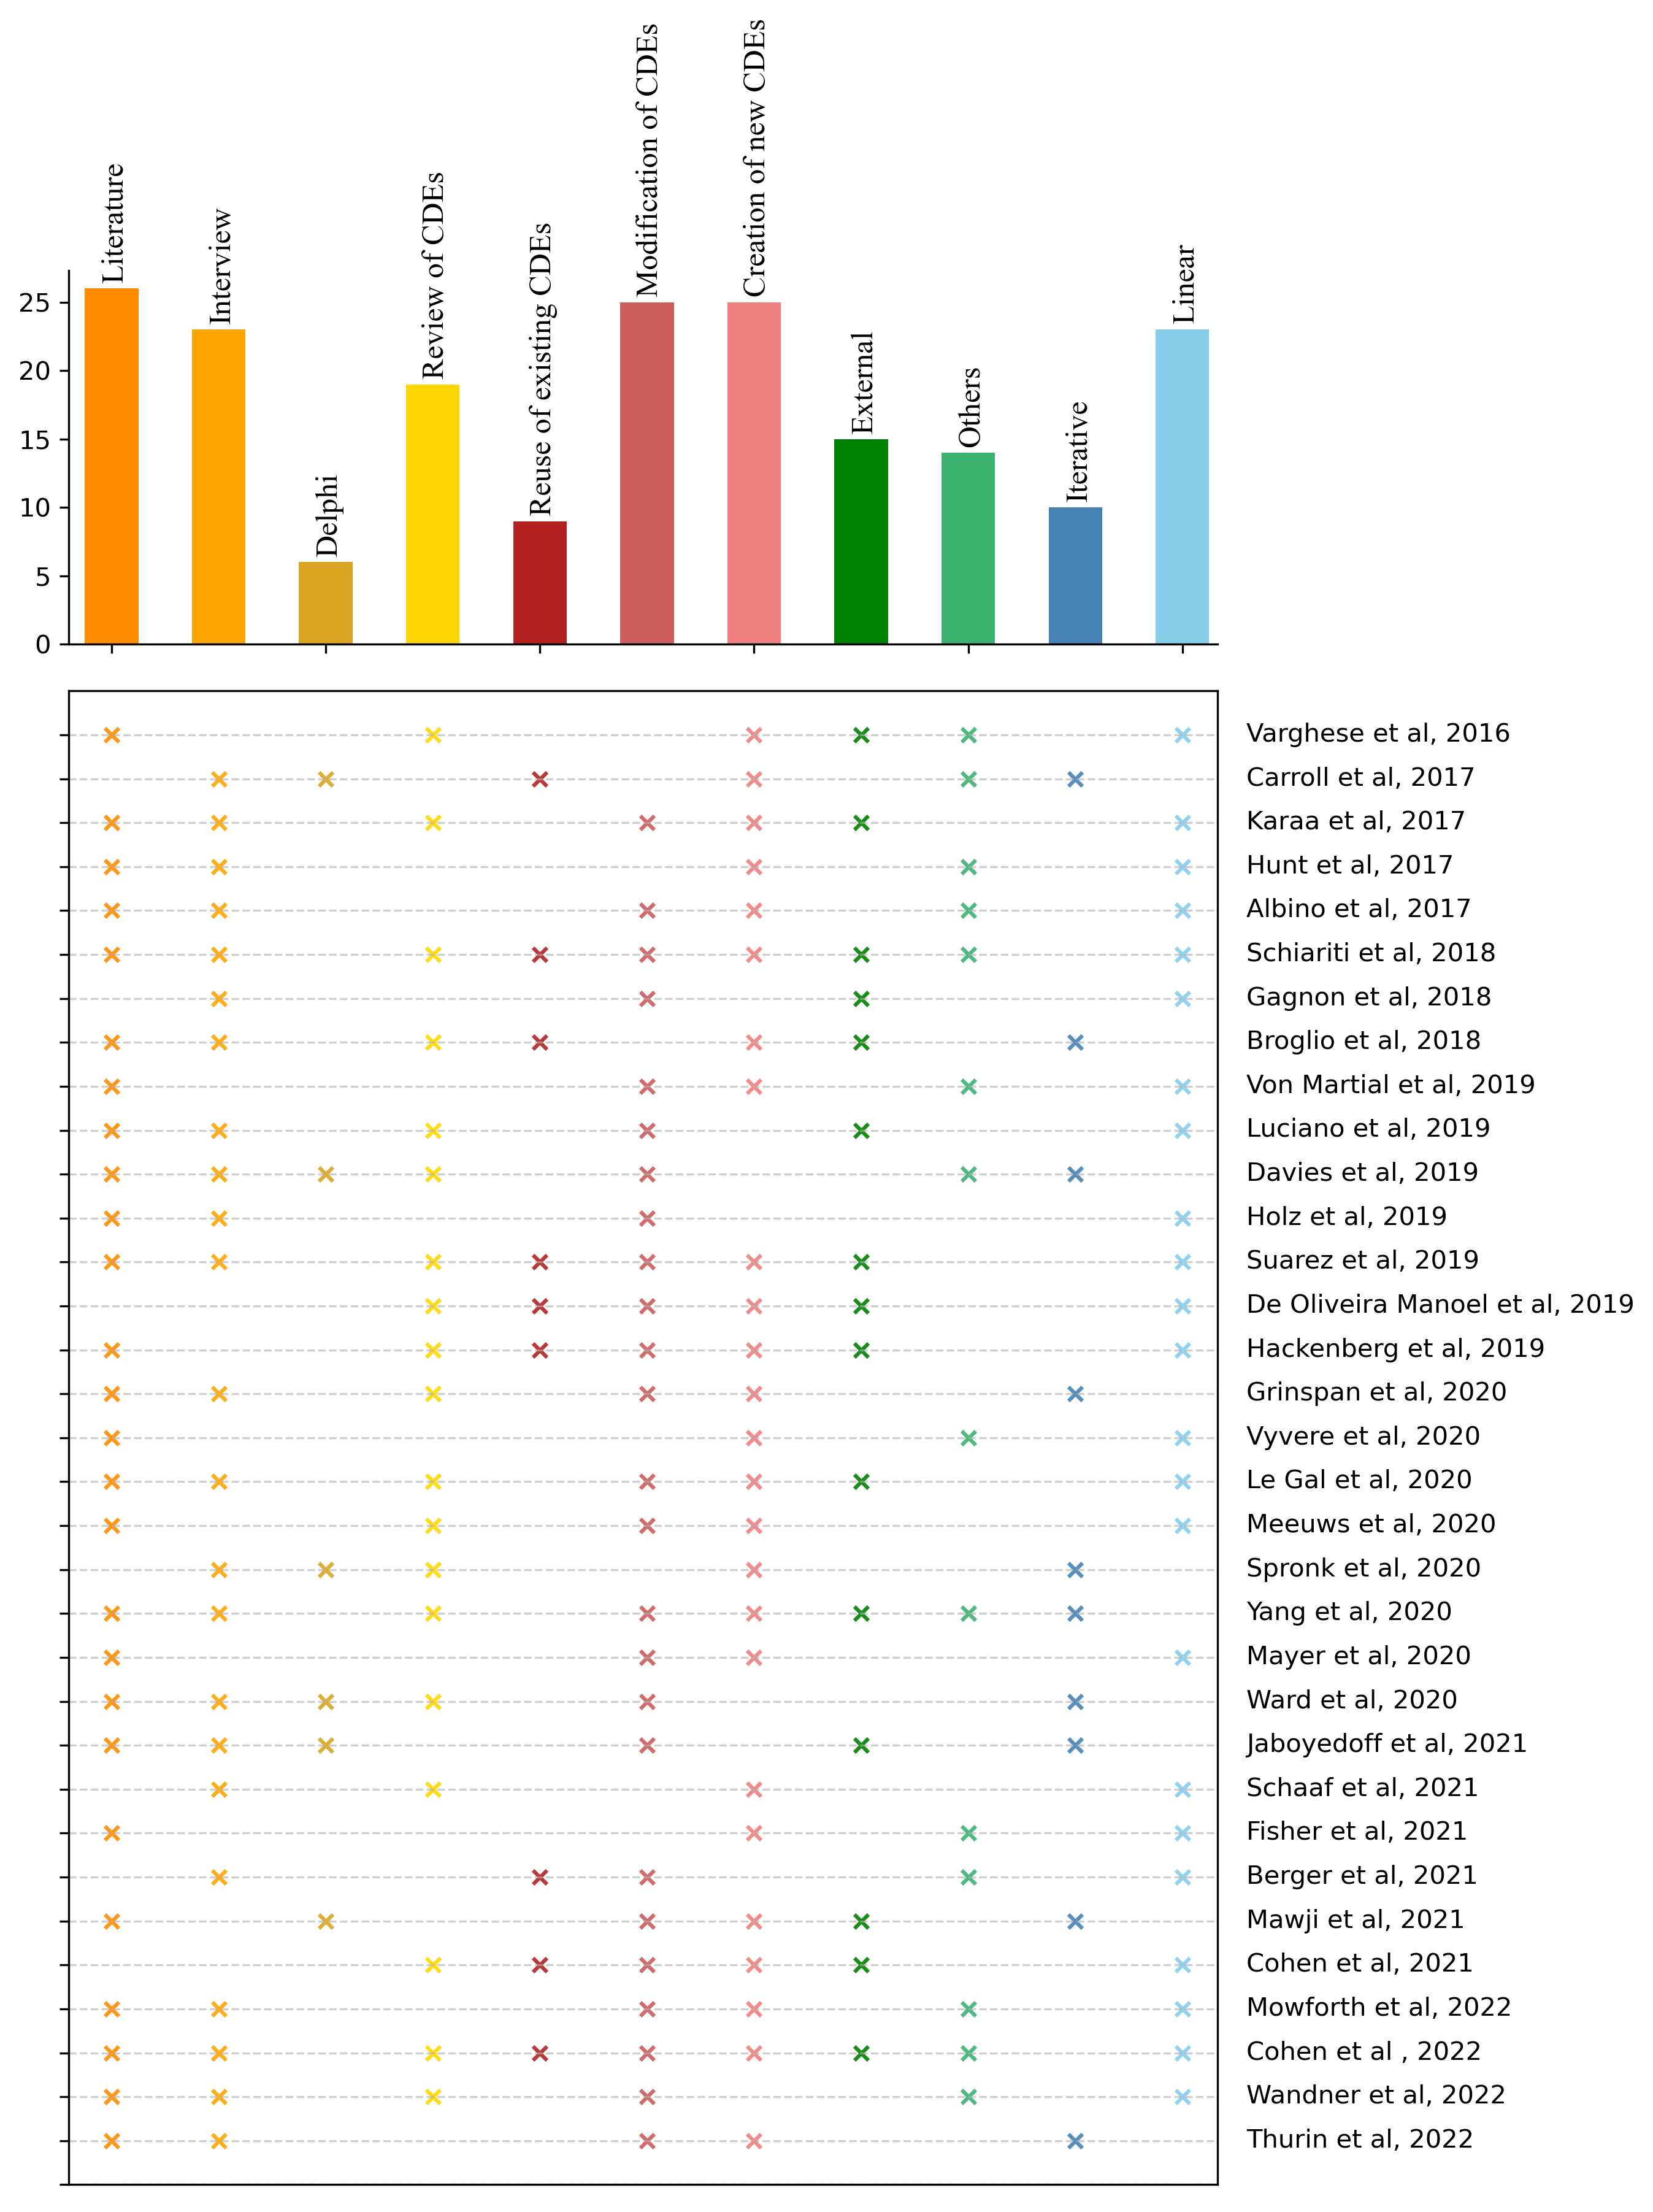

In [416]:
colors = ["darkorange", "orange", "goldenrod", "gold", "firebrick", "indianred", "lightcoral", "green", "mediumseagreen", "steelblue", "skyblue"]
def scatter_hist(x, y, ax, ax_histx):
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax.set_xlim([-0.4,10.33])
    ax.set_ylim([0, 34])
    
    for i in range(noc):
        ax.scatter(x_cols[i], y_cols[i], s=30, marker ='x', color = colors[i], alpha = 0.9)
    
    ax.set_yticks(np.array([i for i in range(N+1)]))
    ax.axes.get_xaxis().set_visible(False)
    
    vec = np.array([i for i in range(11)])
    zeros = np.zeros(11)
    ax.plot(vec, zeros, 'ws')
    i = 1
    for l in range(len(names_sorted)):
        string = names_sorted[l]+', '+str(years_sorted[l])
        ax.text(10.6, i-0.15, string)
        i += 1
    ax.grid(which='major', axis = 'y', linestyle = '--', alpha = 0.6)
    ax.grid(True)
    ax.set_yticklabels([])

    binwidth = 0.5
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)

    heights = []
    for i in range(noc):
        heights.append(ax_histx.hist(x_hist_cols[i],align='left', bins=bins, color = colors[i])[0])
    right_side = ax_histx.spines["right"]
    right_side.set_visible(False)
    top_side = ax_histx.spines["top"]
    top_side.set_visible(False)
    return heights
    
    

fig = plt.figure(figsize=(10, 13), dpi=300)
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)

heights = scatter_hist(x, y, ax, ax_histx)
real_heights = []
for el in heights:
    real_heights.append(max(el))
mylabels = ['Literature', 
            'Interview', 
            'Delphi',
            'Review of CDEs', 
            'Reuse of existing CDEs',
            'Modification of CDEs',
            'Creation of new CDEs', 
            'External',
            'Others', 
            'Iterative',
            'Linear'
           ]

for i in range(len(mylabels)):
    plt.text(-0.1+i, real_heights[i]+0.9, mylabels[i], rotation=90, fontsize=12, **hfont)

plt.savefig('Figure 5', bbox_inches='tight')

## Yearly article count

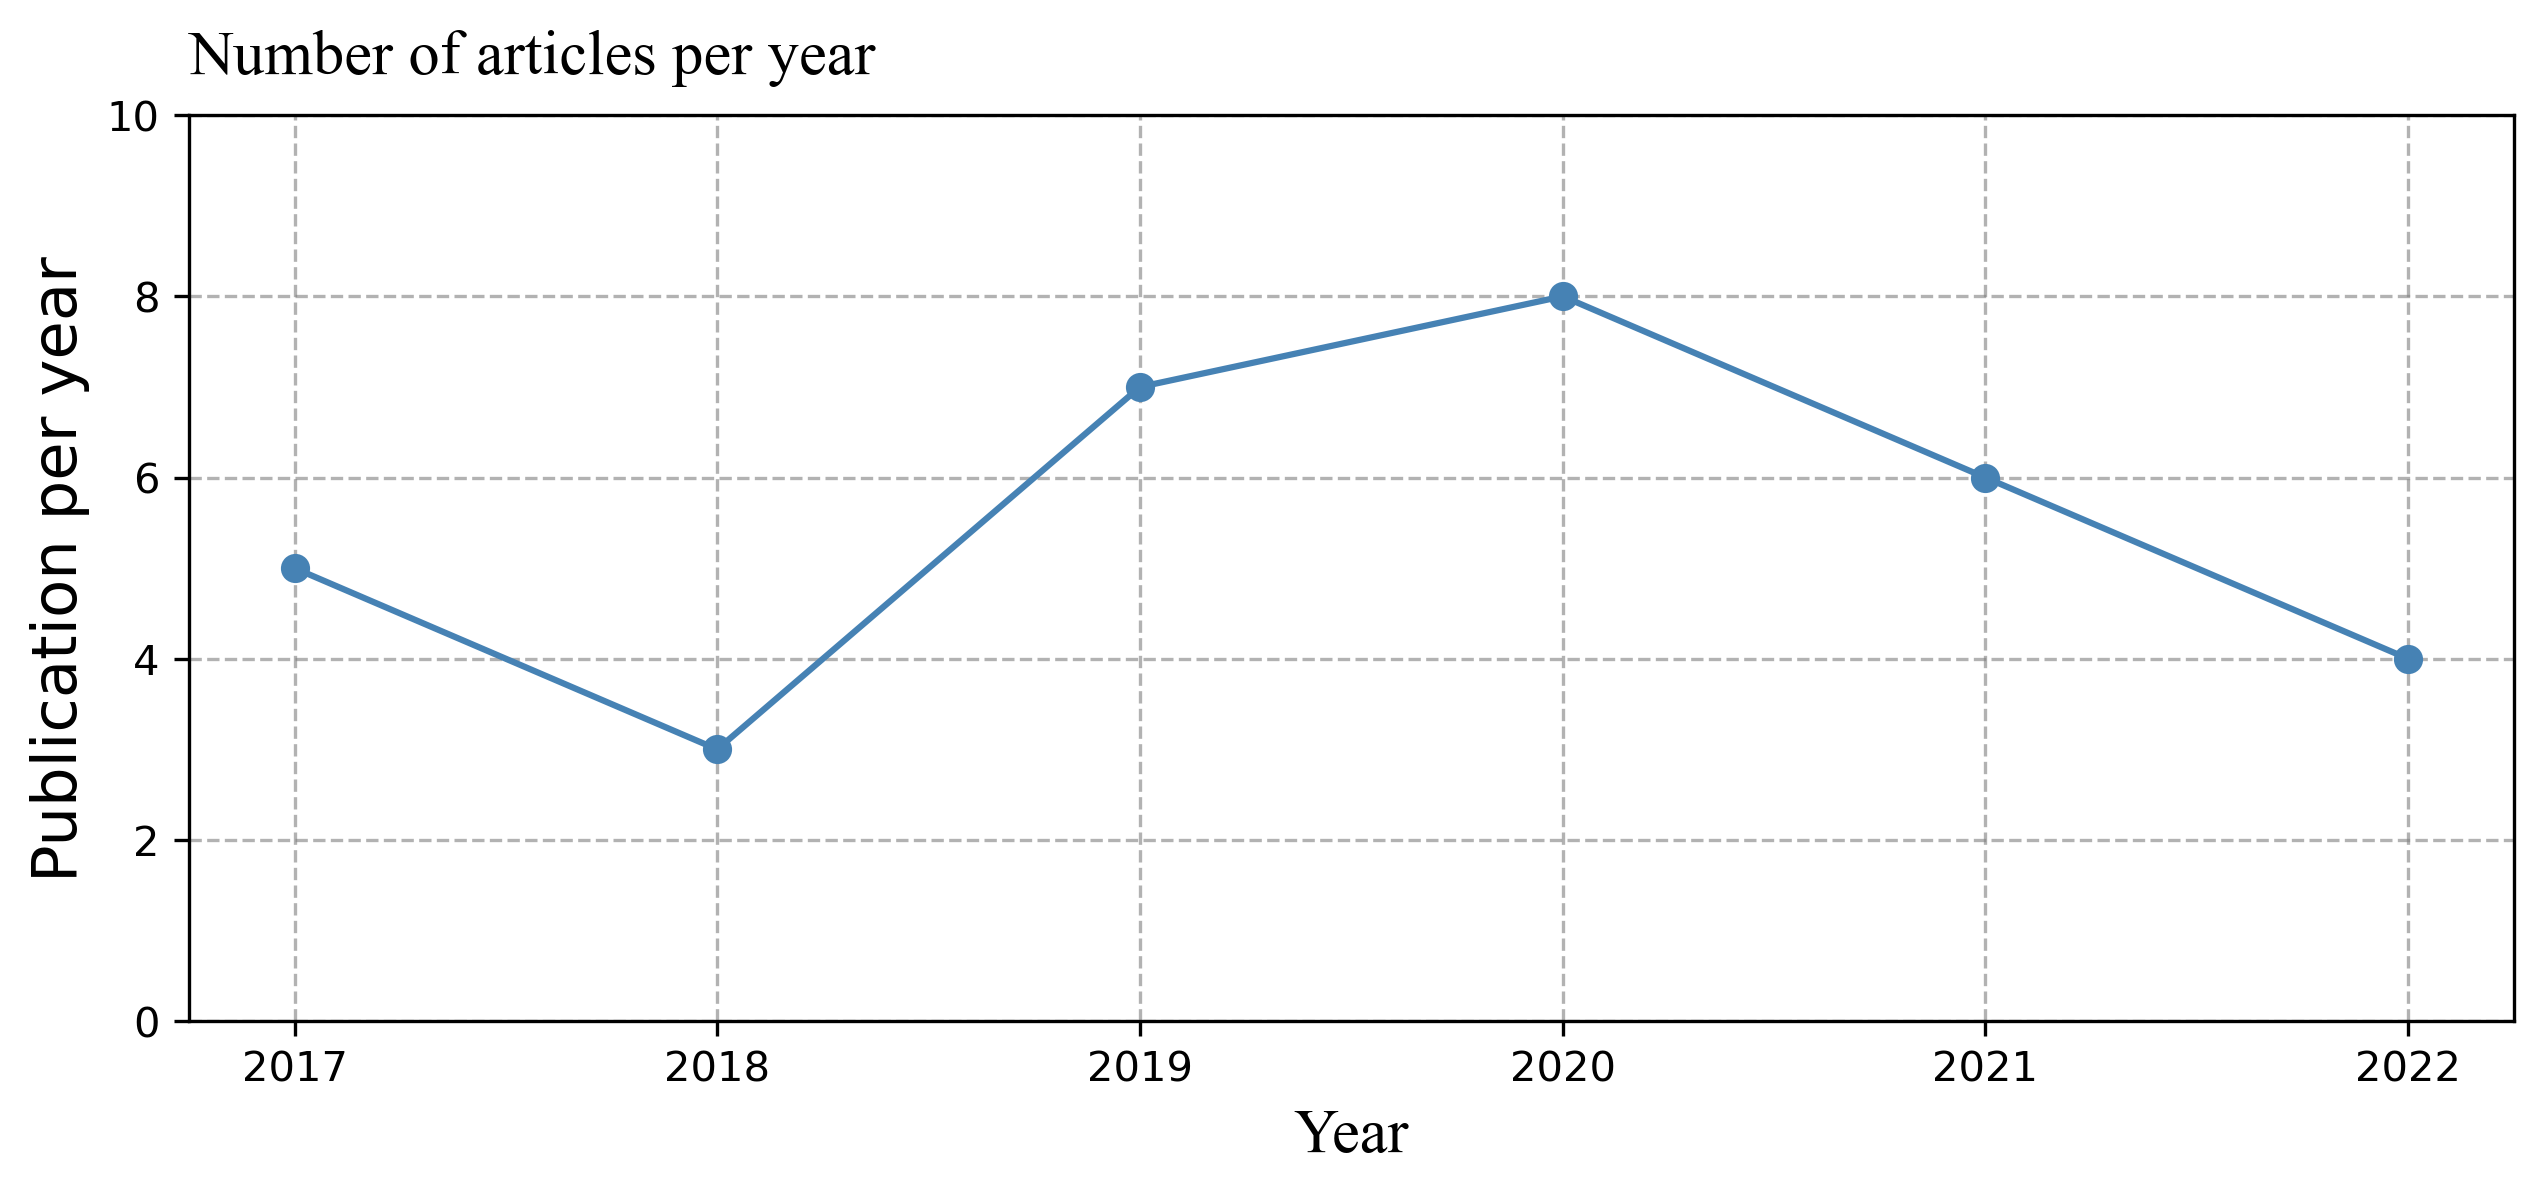

In [9]:
Year= list(df2.PublicationYear)
Counter(sorted(Year))

figure(figsize=(10, 4), dpi=300)

x = [2017, 2018, 2019, 2020, 2021, 2022]
y = [5, 3, 7, 8, 6, 4]


plt.plot(x, y, marker='o', color = "steelblue")

# Label
hfont = {'fontname':'Times New Roman'}
plt.xlabel("Year", fontsize=15, **hfont)
plt.ylabel("Publication per year",  fontsize=15,)

# Adding Title 
plt.title(label="Number of articles per year", **hfont,
            fontsize=15,
            color="black", 
            pad='10', 
            loc="left")

# Display
plt.grid(which='major', 
         linestyle = '--', 
         alpha = 0.6, 
         color = "grey")
plt.ylim([0, 10])
#plt.savefig('Figure 2', bbox_inches='tight')
plt.show()

In [10]:
#df3.query('Publication_Year == 2001 & Modification != "Modification"')

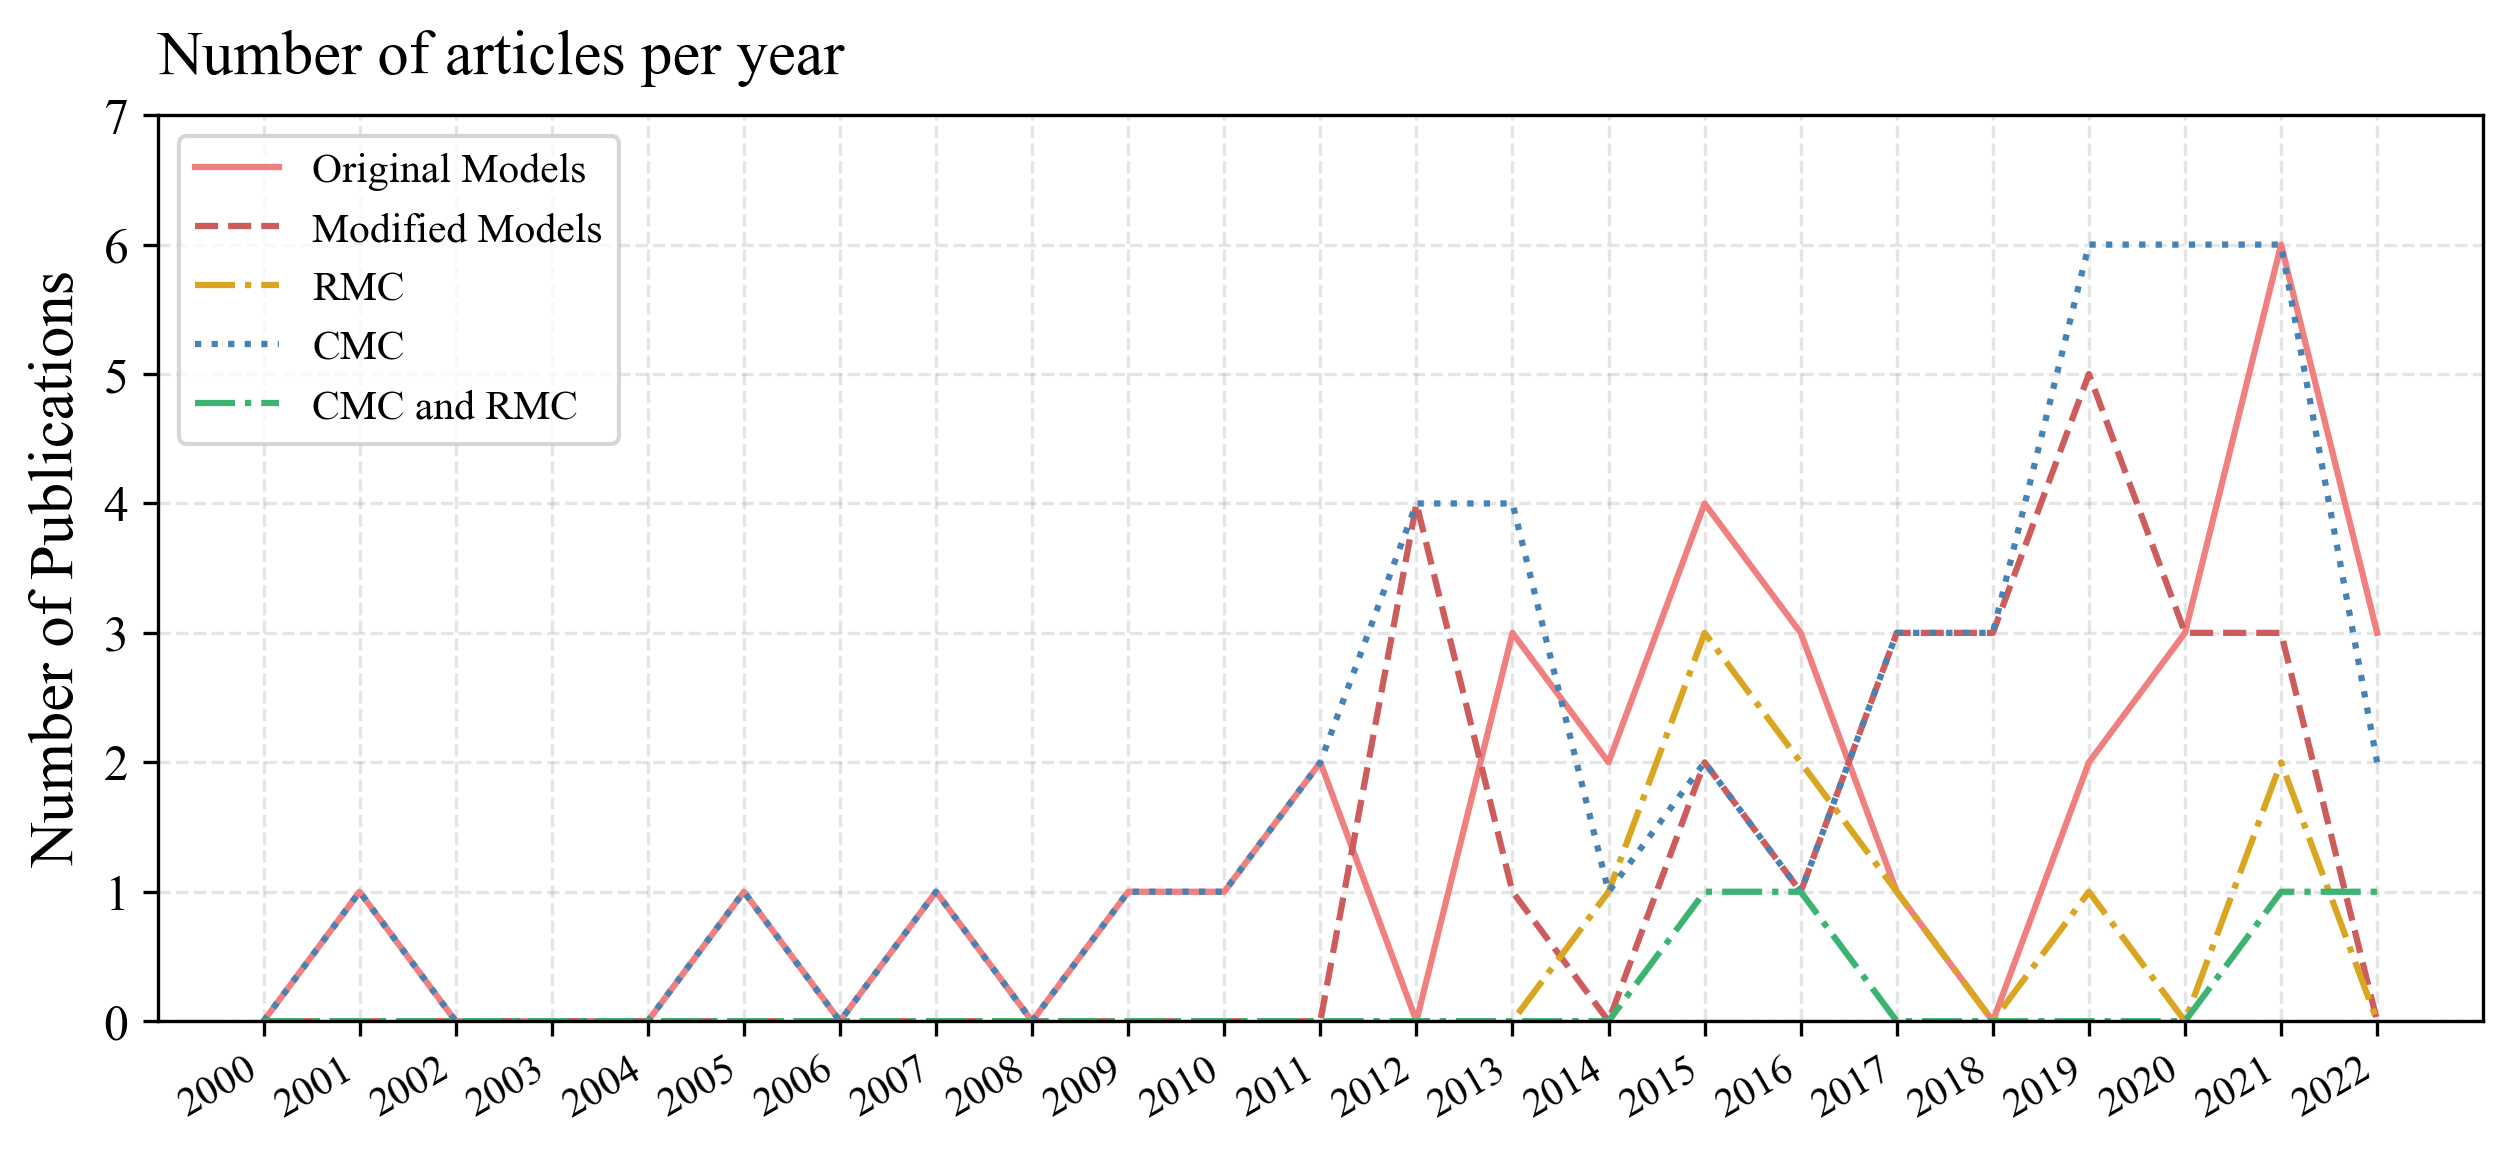

In [408]:
# to count how many papers per year created an origiginal CDE/CDM/CDS or used/modified an existing CDE/CDM/CDS, 
# and how many are focused on the rare or common medical conditions. 

df3 = pd.read_excel(r'Supplenmetal_Table_1.xlsx', sheet_name= "pre-analysis2000-2022")

number_of_years = 2022 - 2000 + 1
number_of_articles_original = np.zeros(number_of_years)
number_of_articles_Modification = np.zeros(number_of_years)
number_of_articles_rare = np.zeros(number_of_years)
number_of_articles_common = np.zeros(number_of_years)
number_of_articles_Both = np.zeros(number_of_years)
N = len(df3.Publication_Year)

for i in range(N):
    publ_year = df3.Publication_Year[i]
    modific = df3.Modification[i]
    Condition_Domain = df3.Condition_Domain[i]
    
    if modific == "Original": 
        number_of_articles_original[publ_year-2000] += 1
    if modific == "Modification":
        number_of_articles_Modification[publ_year-2000] += 1
    if Condition_Domain == "Rare medical condition":
        number_of_articles_rare[publ_year-2000] += 1
    if Condition_Domain == "Common medical condition":
        number_of_articles_common[publ_year-2000] += 1
    if Condition_Domain == "Both":
        number_of_articles_Both[publ_year-2000] += 1
        
#print('number of articles with original CDEs 2000-2022:', number_of_articles_original)
#print('number of articles with modified CDEs 2000-2022:', number_of_articles_Modification)
#print('number of articles with Rare condition 2000-2022:', number_of_articles_rare)
#print('number of articles with common conditions 2000-2022:', number_of_articles_common)
#print('number of articles with both conditions 2000-2022:', number_of_articles_Both)


figure(figsize=(10, 4), dpi=300)

import matplotlib.font_manager as font_manager

x = [2000, '2001', 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 
     2019, 2020, 2021, 2022]

Original = number_of_articles_original
Modified = number_of_articles_Modification
Rare = number_of_articles_rare
Common = number_of_articles_common
Both = number_of_articles_Both


# Label and Title
hfont = {'fontname':'Times New Roman'}
font = font_manager.FontProperties(family='Times New Roman',
                                   #weight='bold',
                                   style='normal', size=10)


plt.plot(x, Original, label = "Original Models", linestyle="-", color = 'lightcoral')
plt.plot(x, Modified, label = "Modified Models", linestyle="--", color = 'indianred')
plt.plot(x, Rare, label = "RMC", linestyle="-.", color = 'goldenrod')
plt.plot(x, Common, label = "CMC", linestyle=":", color='steelblue')
plt.plot(x, Both, label = "CMC and RMC", linestyle="-.", color='mediumseagreen')

plt.ylabel("Number of Publications",  fontsize=15, **hfont)

# adding grids in the background

plt.grid(which='major', 
         linestyle = '--', 
         alpha = 0.2, 
         color = "grey")

# Adding Title 
plt.title(label="Number of articles per year", **hfont,
            fontsize=15,
            color="black", 
            pad='10', 
            loc="left")

plt.xticks(rotation = 30, ha = "right", fontsize=10, family='Times New Roman')
plt.yticks(fontsize = 12, family='Times New Roman')
plt.ylim([0, 7])
plt.legend(prop=font, loc = 'upper left')
plt.savefig('Figure 2', bbox_inches='tight')
plt.show()

# Pie Chart

In [254]:
liste = []
cnts = []
i = 0
j = 0
for el in df3['Condition_Domain']:
    if el == 'Common medical condition':
        #print(df3['Medical_Condition'][i])
        
        bo = False
        for el2 in liste:
            if str(el2) == str(df3['MostOccuringConditions'][i]):
                bo = True
                cnts[j-1] += 1
                
        if bo == False:
            cnts.append(0)
            cnts[j] += 1
            liste.append(df3['MostOccuringConditions'][i])
            j+=1
    i += 1
    
#print(cnts)

#print(liste)  



from numpy import nan

newList = list()
for element in liste:
    if str(element) != "nan":
        newList.append(element)

def Sorting(newList):
    newList.sort(key=len)
    return newList
print(Sorting(newList))
 
#print("Output list is:", newList)

['Cancer', 'Stroke', 'Sepsis', 'Epilepsy', 'Concussion', 'Drug safety', 'Maternity care', 'Celebral Palsy', 'Kidney Diseases', 'Gulf War Illness', 'Spinal Cord Injury ', 'Paediatrics Diseases', 'Traumatic Brain Injury', 'Traumatic brain injury', 'Venous Thromboembolism (VTE)', 'Chiari Malformation Type I (CMI)', 'Degenerative Cervical Myelopathy', 'Neuroinflammatory Demyelinating Diseases (NIDs)', 'Unruptured Intracranial Aneurysms (UIA) and Subarachnoid Hemorrhage (SAH)']


In [255]:
liste2 = []
cnts = []
i = 0
j = 0
for el in df3['Condition_Domain']:
    if el == 'Rare medical condition':
        #print(df3['Medical_Condition'][i])
        
        bo = False
        for el2 in liste2:
            if str(el2) == str(df3['MostOccuringConditions'][i]):
                bo = True
                cnts[j-1] += 1
                
        if bo == False:
            cnts.append(0)
            cnts[j] += 1
            liste2.append(df3['MostOccuringConditions'][i])
            j+=1
    i += 1
    
#print(cnts)

#print(liste2)  


newList2 = list()
for element in liste2:
    if str(element) != "nan":
        newList2.append(element)
 
print("Output list is:", newList2)

Output list is: ['Congenital Muscle Disease', 'Spinal Cord Injury ', 'Rare Diseases', 'Mitochondrial Disease', 'Myeloid Leukemia', 'Undiagnosed Disease', 'Rare Lung Diseases']


In [256]:
liste3 = []
cnts = []
i = 0
j = 0
for el in df3['Condition_Domain']:
    if el == 'Both':
        #print(df3['Medical_Condition'][i])
        
        bo = False
        for el2 in liste3:
            if str(el2) == str(df3['MostOccuringConditions'][i]):
                bo = True
                cnts[j-1] += 1
                
        if bo == False:
            cnts.append(0)
            cnts[j] += 1
            liste3.append(df3['MostOccuringConditions'][i])
            j+=1
    i += 1
    
#print(cnts)
#print(liste3)  

newList3 = list()
for element in liste3:
    if str(element) != "nan":
        newList3.append(element)
        newList3.sort(key=len)
 
print("Output list is:", newList3)

Output list is: ['Drug safety', 'Paediatrics Diseases']


In [257]:
# get the counts for the first pie chart
print(Counter(list(df3.Condition_Domain)))

# get the counts for the second pie chart
print(Counter(list(df3.organ_function)))

# get the counts for the third pie chart
print(Counter(list(df3.shortANDlong)))

Counter({'Common medical condition': 45, 'Rare medical condition': 10, 'Both': 4, nan: 1})
Counter({'brain': 24, 'multi-organ': 15, 'blood/Hematopoietic system': 4, 'multi organ/ other (pregnancy)': 2, 'multi organ/ other (rare disease)': 2, 'spinal cord': 2, 'multi organ/ other': 2, 'prostate': 1, 'multi-organ (trauma)': 1, 'Spinal Cord': 1, 'Kidney': 1, 'heart': 1, 'multi organ/ other (pediatric critical illness)': 1, 'multi organ/ other (brain, cardiovascular system, colon)': 1, 'teeth': 1, nan: 1})
Counter({'long': 38, 'short': 10, 'both': 10, nan: 2})


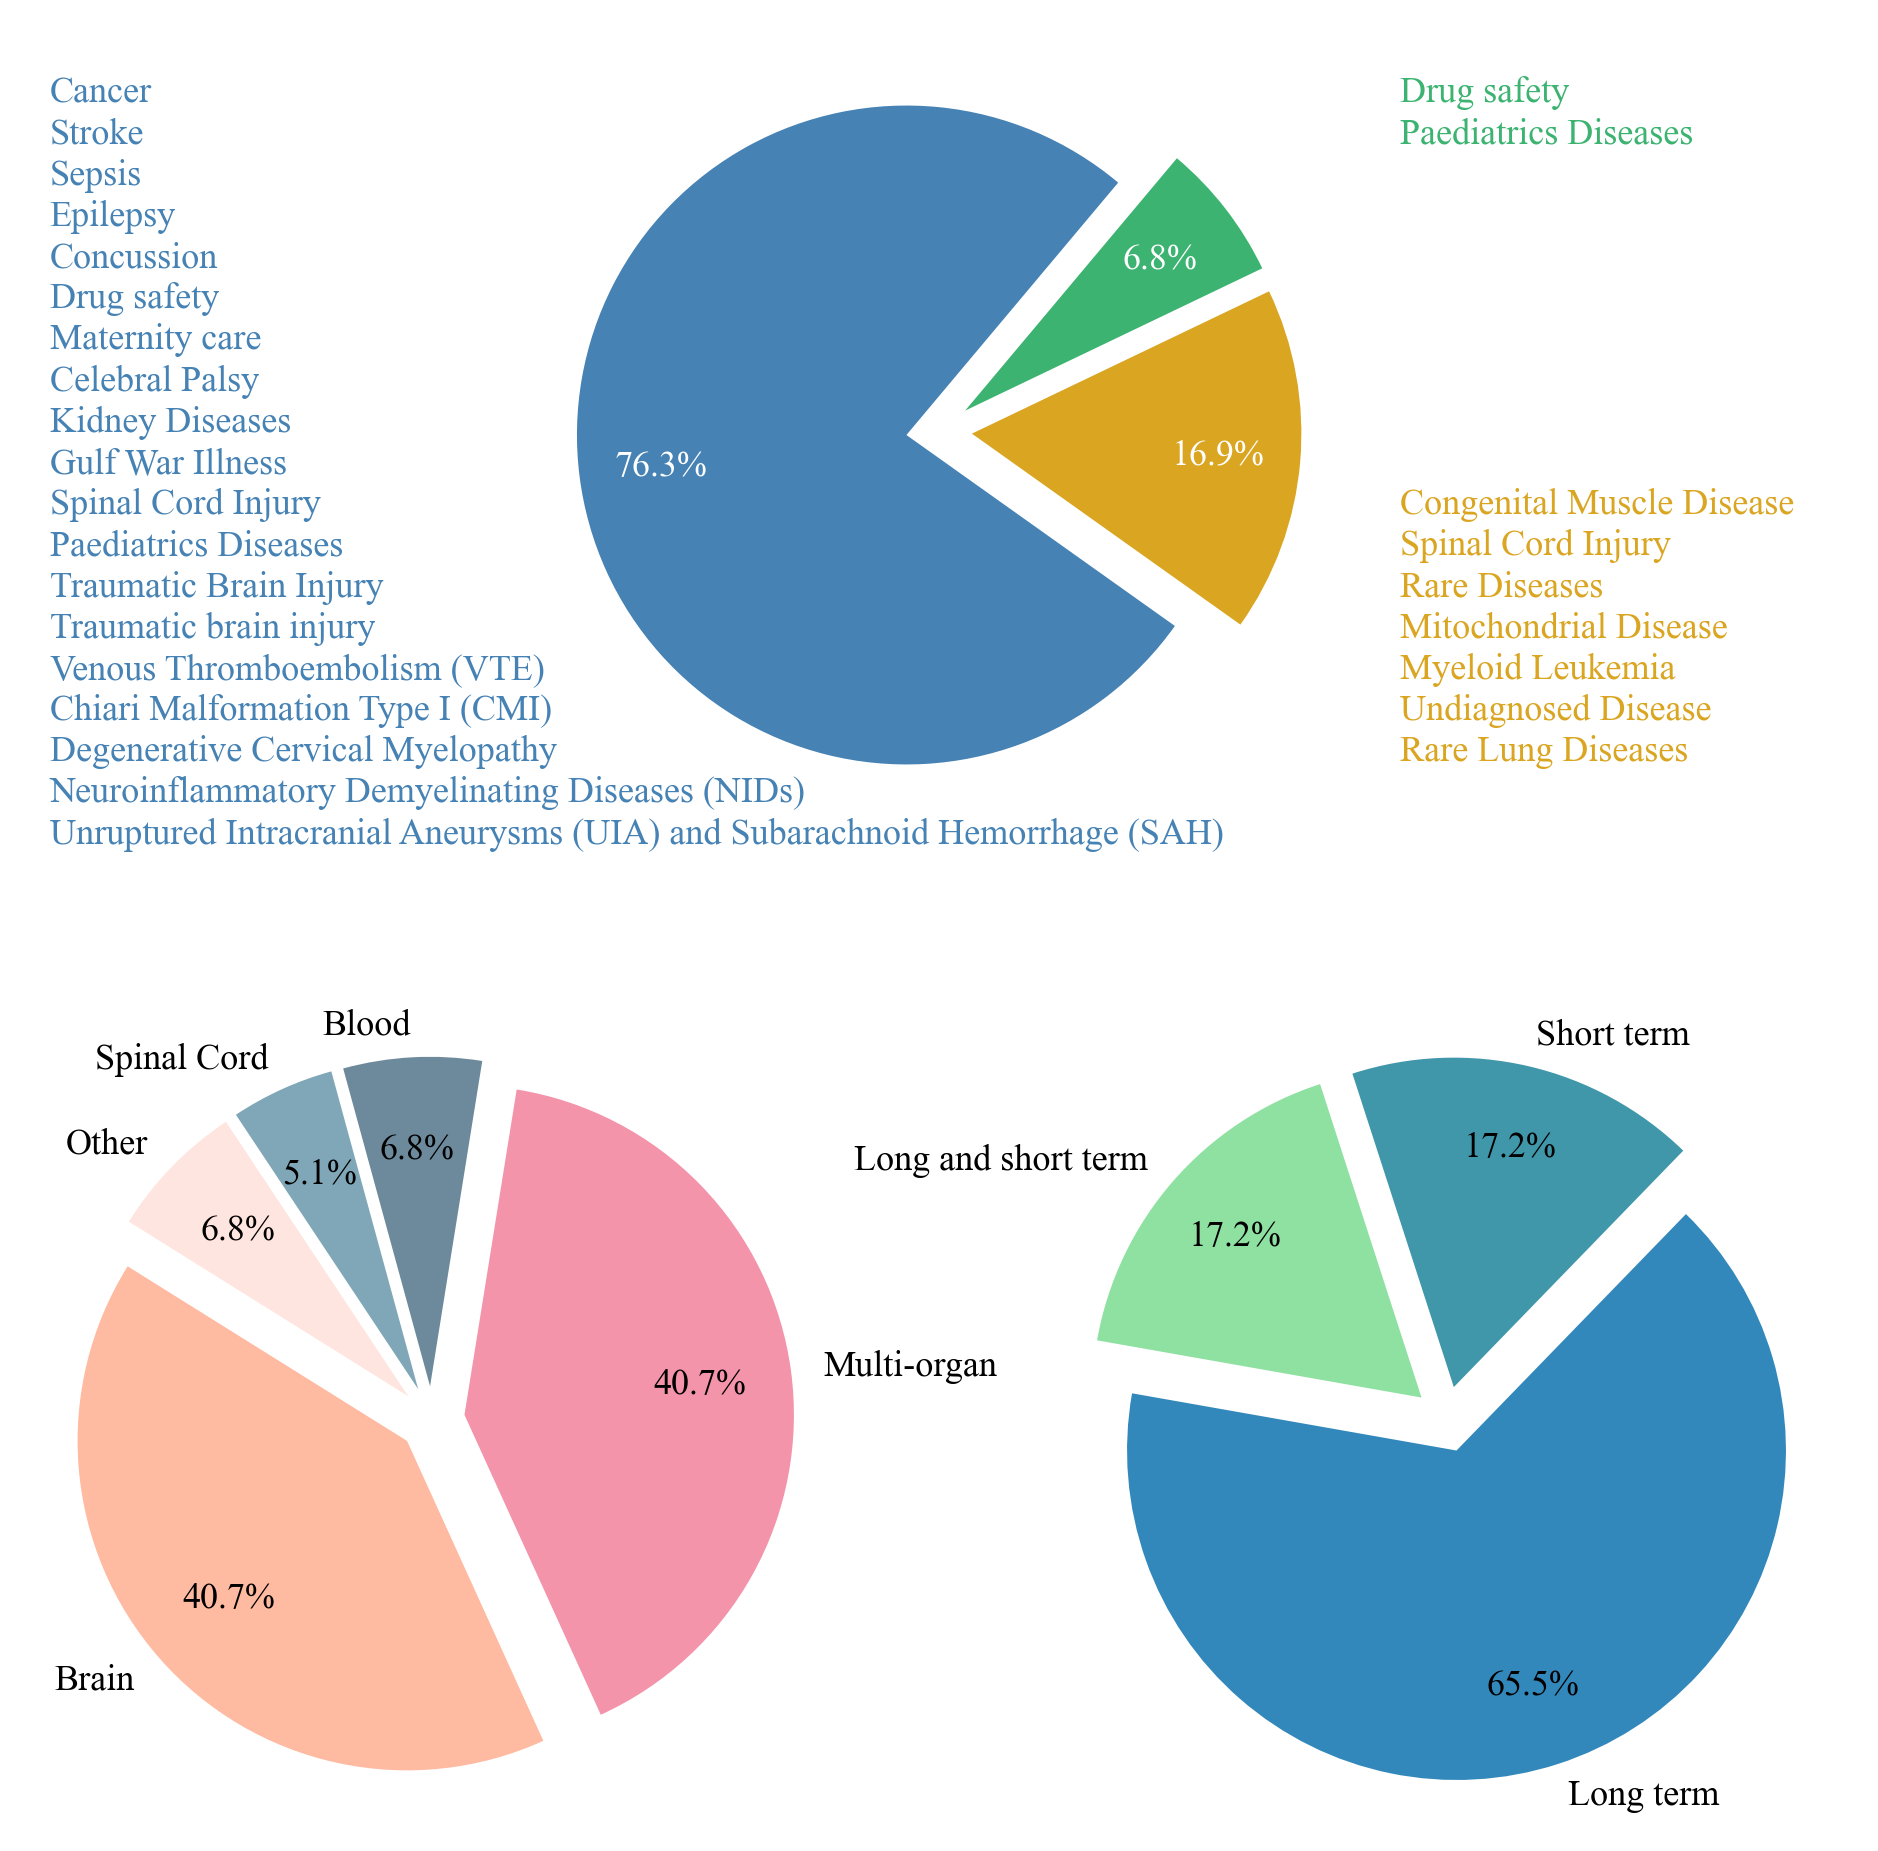

In [417]:
import matplotlib.gridspec as gridspec

plt.subplots(figsize=(12,12), dpi=200)#, facecolor = 'smoke')
hfont = {'fontname':'Times New Roman'}

# piechart 2
#mylabels1 = ['CMC', 'RMC','CMC and RMC']

plt.subplot(2, 1, 1)
plt.pie(np.array([45,10,4]),
        colors=["steelblue", "goldenrod", "mediumseagreen"], 
        startangle = 50, 
        explode = [0.1, 0.1, 0.1], 
        pctdistance=0.75, 
        textprops={'color':"white", 'fontname':'Times New Roman', 'fontsize': 13}, 
        autopct='%1.1f%%')

#print the text around the plot 
fonts=13
for i in range(len(Sorting(newList))):
    plt.text(-2.7, 1.0-i/8, Sorting(newList)[i], fontsize = fonts, **hfont,  color="steelblue")
    
for i in range(len(newList2)):
    plt.text(+1.4, 1.0-10/8-i/8, newList2[i], fontsize = fonts, **hfont, color="goldenrod")
    
for i in range(len(newList3)):
    plt.text(+1.4, 1.0-i/8, newList3[i], fontsize = fonts, **hfont, color="mediumseagreen")
plt.margins(x=0, y=0)


# Piechart 2
plt.subplot(2, 2, 4)
#other = short and long term
plt.pie(np.array([38,10,10]), 
        labels = ['Long term', 'Short term','Long and short term'], 
        colors={'#8FE1A2','#4097AA', '#38BF'},
        labeldistance=1.1,
        startangle = 170, 
        explode = [0.1, 0.1, 0.1],
        pctdistance=0.75,
        textprops={'color':"black", 'fontname':'Times New Roman', 'fontsize': 13}, 
        autopct='%1.1f%%')

plt.margins(x=0, y=0)


# Piechart 3
# Other category: Prostate, Kidey, 'hearth','Teeth'
#F9F5E8
plt.subplot(2, 2, 3)
plt.pie(np.array([24, 24, 4, 3, 4]),
        labeldistance=1.1,
        labels = ['Brain', 'Multi-organ',  'Blood','Spinal Cord', 'Other'],
        colors={'#FFBAA2', '#FFE5DF', '#6C8A9B', '#F494AB', '#7FA7B8'}, 
        startangle = 148, 
        explode = [0.1, 0.1, 0.1, 0.1, 0.1], 
        pctdistance=0.72, 
        textprops={'color':"black", 'fontname':'Times New Roman', 'fontsize': 13},
        autopct='%1.1f%%'
       )
plt.margins(x=0, y=0)




plt.savefig('Figure 3.svg', bbox_inches='tight')
plt.show()

## Stakeholder involvement

Conception =  24
Data collection =  6
evaluation =  5
Implementation =  1
Domain experts =  23
Clinicians =  14
IT personal =  5
Registry staff =  3
Patients =  3
Working group meetings =  9
Expert group meetings =  4
Consensus meeting =  1
Teleconferences =  3
Interviews =  3
Survey =  3
Questionnaire =  1


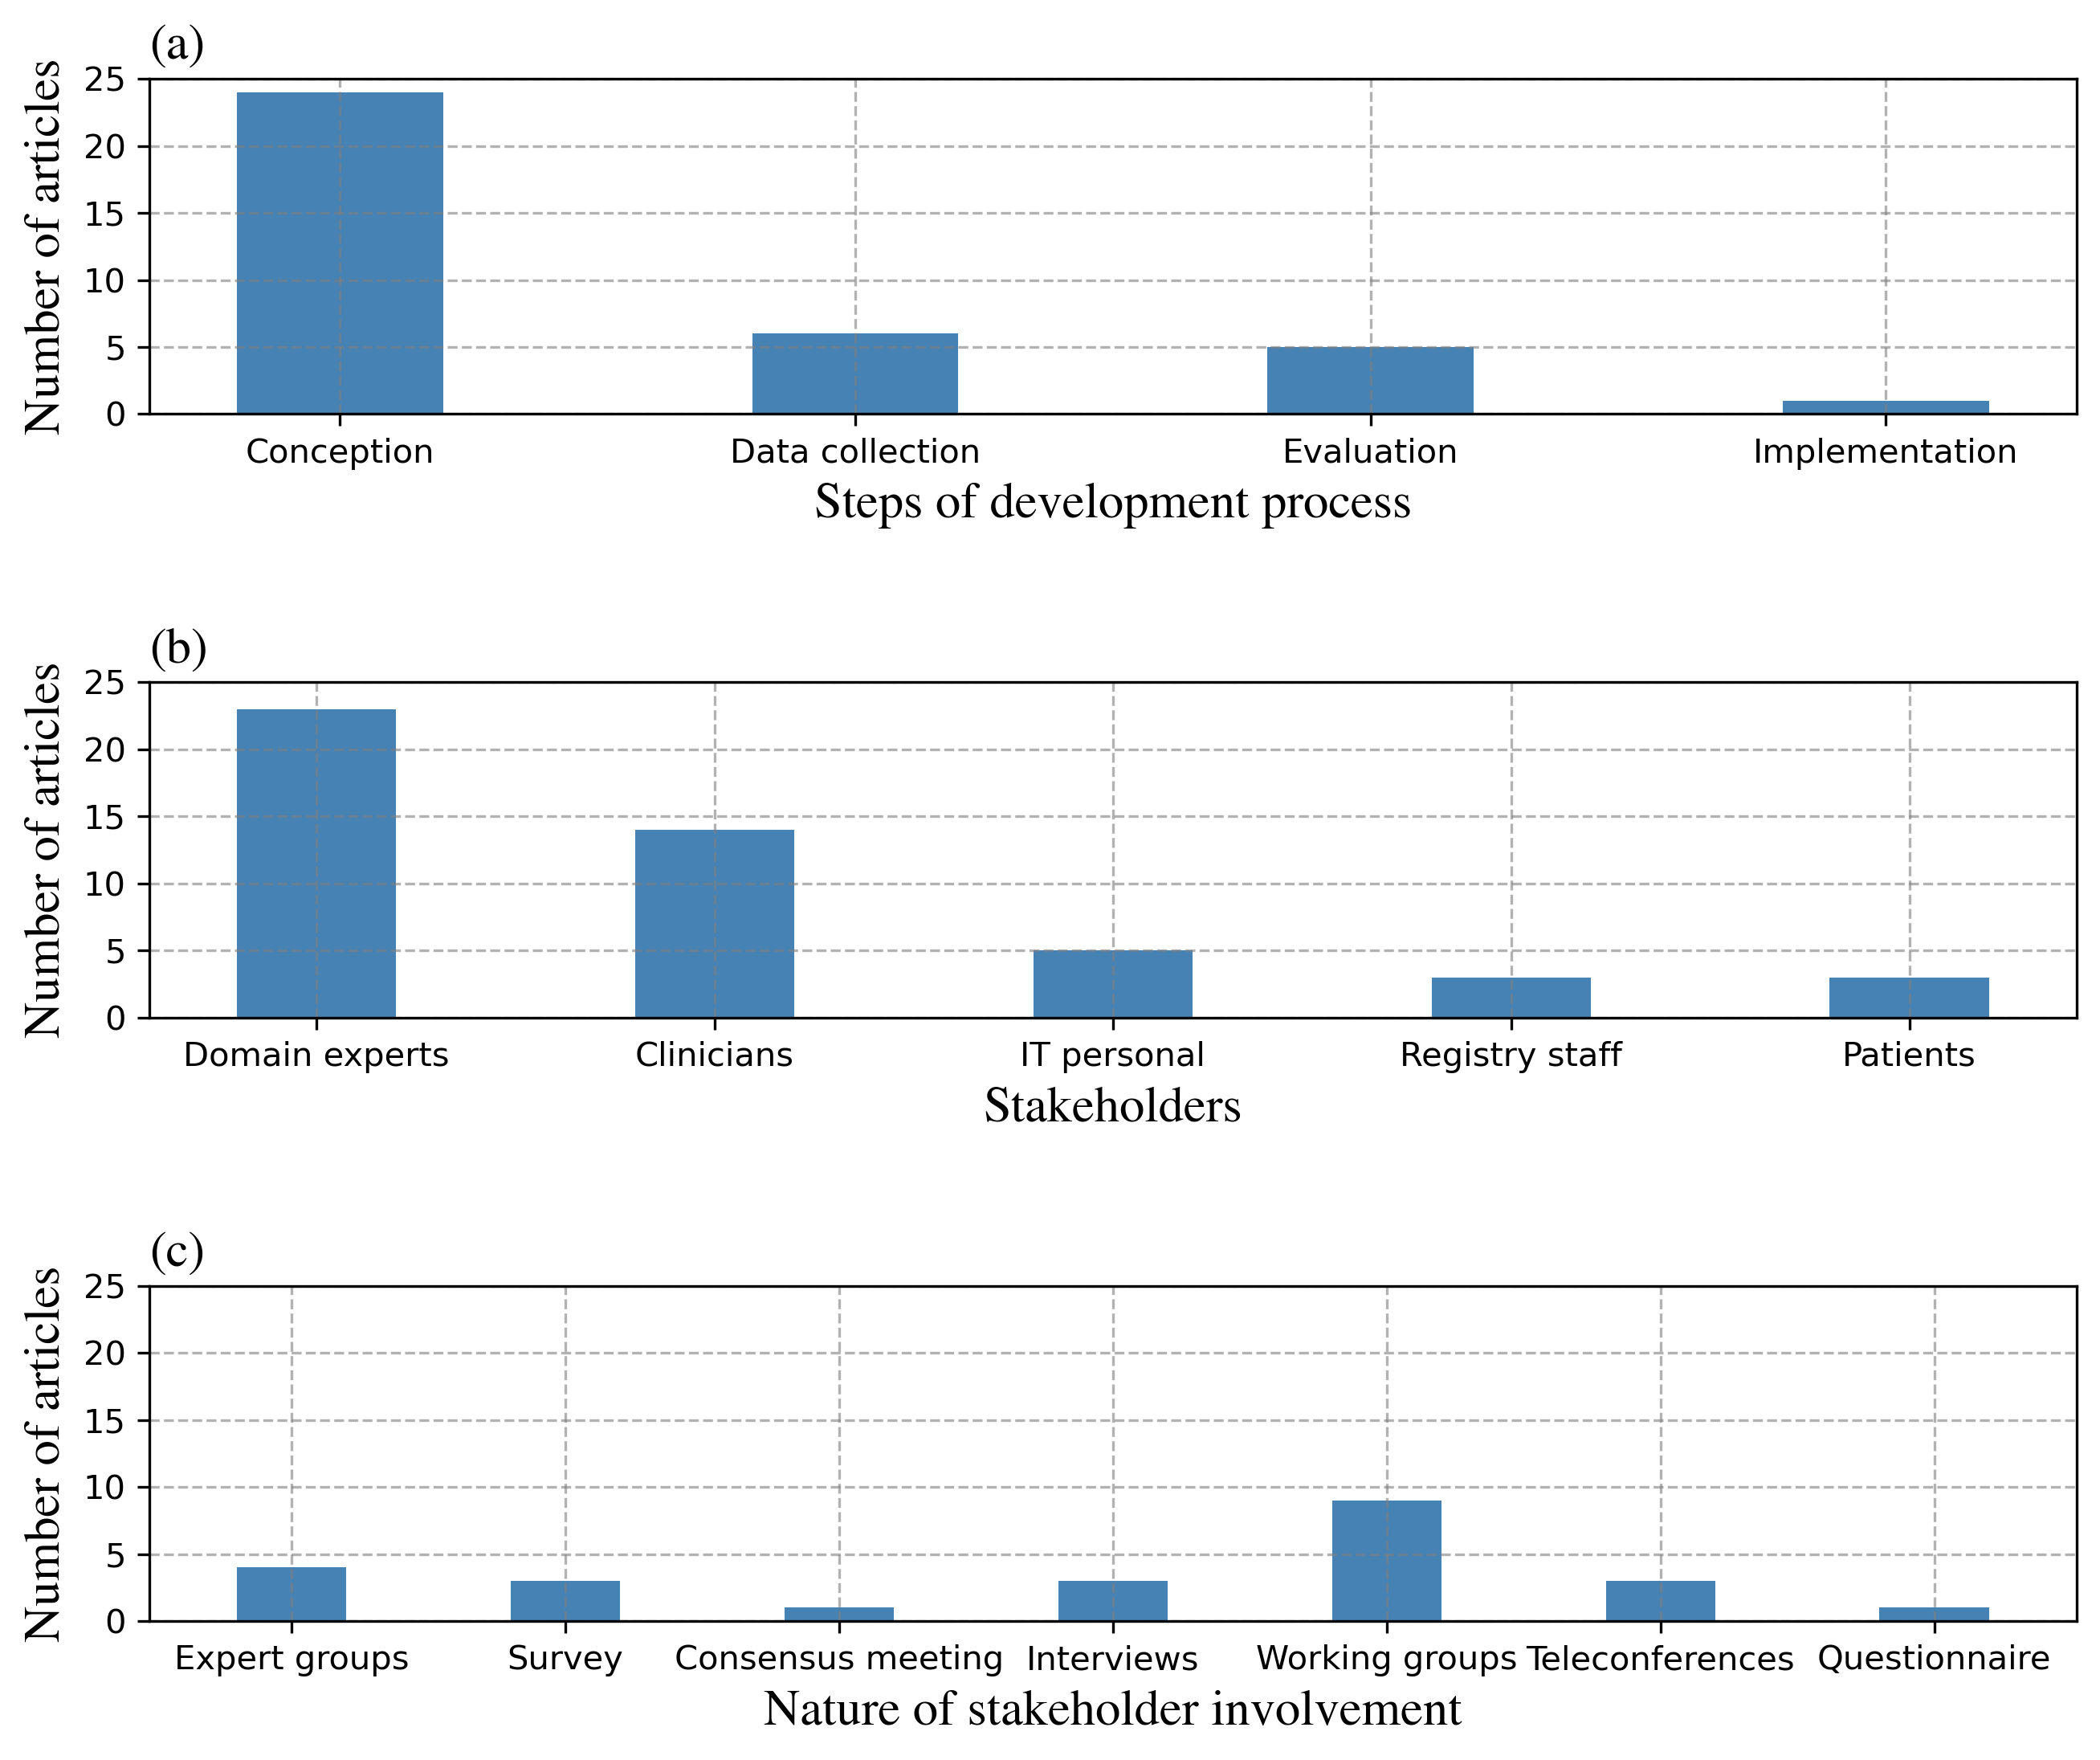

In [11]:
fig, axs = plt.subplots(3, figsize=(10,8), dpi=300)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.8)


# A
conception = df2.When_did_the_stakeholders_get_involved2.str.contains('conception').sum()
Dcollection = df2.When_did_the_stakeholders_get_involved2.str.contains('data collection').sum()
evaluation = df2.When_did_the_stakeholders_get_involved2.str.contains('evaluation').sum()
Implementation = df2.When_did_the_stakeholders_get_involved2.str.contains('Implementation').sum()

print("Conception = ", conception)
print("Data collection = ", Dcollection)
print("evaluation = ", evaluation)
print('Implementation = ', Implementation)


# Plot number of publication per year 
x = ['Conception',  'Data collection','Evaluation', 'Implementation'] # years
y = [conception, Dcollection, evaluation, Implementation] # number of publications per years.

axs[0].bar(x, y, color = "steelblue", width = 0.4)

# Labelling 

axs[0].set_xlabel("Steps of development process", fontsize=15,**hfont)
axs[0].set_ylabel("Number of articles", fontsize=15, **hfont)
axs[0].set_title(label='(a)' ,fontsize=15,color="black", loc="left", **hfont)
axs[0].set_xticks(x,  fontsize=12, **hfont)

# Display
axs[0].grid(which='major', 
         linestyle = '--', 
         alpha = 0.6, 
         color = "grey")
axs[0].set_ylim([0, 25])


# B
#get the nature_of_stekeholders_involvement2 raw data from table
whenS= list(df2.When_did_the_stakeholders_get_involved2)
Counter(whenS)
#get the Which_stekeholders_are_involved2 raw data from table
WhichStakeholder= list(df2.Which_stekeholders_are_involved2)
Counter(WhichStakeholder)

# calcuate how often each component was used in differnt papers
D = df2.Which_stekeholders_are_involved2.str.contains('Domain experts').sum()
C = df2.Which_stekeholders_are_involved2.str.contains('Clinicians').sum()
P = df2.Which_stekeholders_are_involved2.str.contains('Patients').sum()
I = df2.Which_stekeholders_are_involved2.str.contains('IT Personal').sum()
R = df2.Which_stekeholders_are_involved2.str.contains('Registry staff').sum()


print("Domain experts = ",D)
print("Clinicians = ",C)
print("IT personal = ",I)
print("Registry staff = ",R)
print("Patients = ",P)


# Plot the number of publication per year 
x = ['Domain experts', 'Clinicians', 'IT personal', 'Registry staff', 'Patients' ] # years
y = [D, C, I, R, P] 

axs[1].bar(x, y, color = "steelblue", width = 0.4)

# Labelling 
axs[1].set_xlabel("Stakeholders", fontsize=15,**hfont)
axs[1].set_ylabel("Number of articles", fontsize=15, **hfont)
axs[1].set_title(label='(b)' ,fontsize=15,color="black", loc="left", **hfont)
axs[1].set_xticks(x,  fontsize=12, **hfont)

# Display
axs[1].grid(which='major', 
         linestyle = '--', 
         alpha = 0.6, 
         color = "grey")
axs[1].set_ylim([0, 25])


# C 
#get the nature_of_stekeholders_involvement2 raw data from table
stakeholderNature= list(df2.nature_of_stekeholders_involvement2)
Counter(stakeholderNature)


# calcuate how often each component was used in differnt papers
WK = df2.nature_of_stekeholders_involvement2.str.contains('Working group meetings').sum()
EM = df2.nature_of_stekeholders_involvement2.str.contains('Expert').sum()
Con = df2.nature_of_stekeholders_involvement2.str.contains('Consensus').sum()
TC = df2.nature_of_stekeholders_involvement2.str.contains('Teleconferences').sum()
IN = df2.nature_of_stekeholders_involvement2.str.contains('Interviews').sum()
SU = df2.nature_of_stekeholders_involvement2.str.contains('Survey').sum()
Q = df2.nature_of_stekeholders_involvement2.str.contains('Questionnaire').sum()

print("Working group meetings = ", WK)
print("Expert group meetings = ", EM)
print("Consensus meeting = ", Con)
print("Teleconferences = ", TC)
print("Interviews = ", IN)
print("Survey = ", SU)
print("Questionnaire = ", Q)


x = ['Expert groups',  'Survey','Consensus meeting', 'Interviews','Working groups', 'Teleconferences',  'Questionnaire' ] # years
y = [EM, SU, Con, IN, WK, TC,   Q] 

axs[2].bar(x, y, color = "steelblue", width = 0.4)

# Labelling 
axs[2].set_xlabel("Nature of stakeholder involvement", fontsize=15, **hfont)
axs[2].set_ylabel("Number of articles", fontsize=15, **hfont)
axs[2].set_title(label='(c)' ,fontsize=15,color="black", loc="left", **hfont)
axs[2].set_xticks(x,  fontsize=12, **hfont)

# Display
axs[2].grid(which='major', 
         linestyle = '--', 
         alpha = 0.6, 
         color = "grey")
axs[2].set_ylim([0, 25])
plt.savefig('Figure 4')